In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn.metrics import classification_report
from scipy.stats import uniform as sp_uniform

import warnings
warnings.filterwarnings("ignore")

In [2]:
biden = pd.read_csv("/Users/liujingyang/Desktop/biden.csv")

In [3]:
#1a.

In [4]:
biden = biden.dropna()
y = biden["biden"].values
X = biden[["female","age","educ","dem","rep"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=25)

In [5]:
biden_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
biden_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

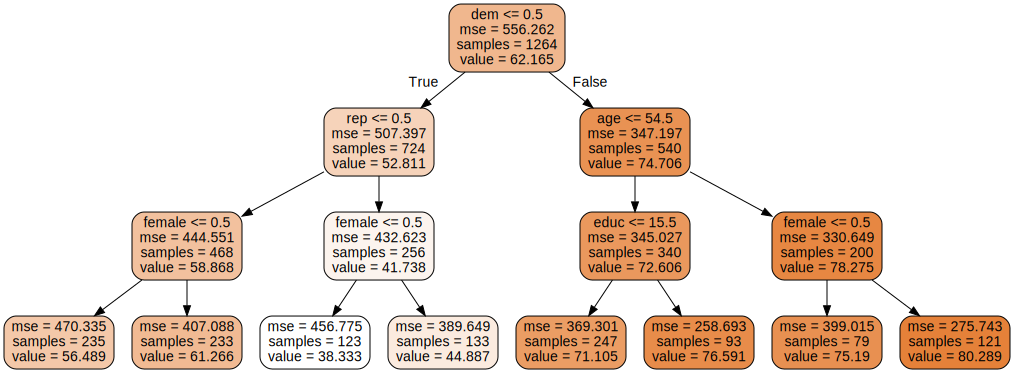

In [6]:
biden_tree_viz = export_graphviz(
    biden_tree,
    out_file=None,
    feature_names=["female","age","educ","dem","rep"],
    class_names=biden.biden,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(biden_tree_viz)
graph.render('biden_tree_viz')
graph

The results show that the sample is divided into groups based on partisan parties, sex, education and age. 

For example, the first node is dem, which determines whether the respondent is a democrat or not. The left-hand branch from the first node is grouped of respondents who are NOT democrats, while the right-hand branch are people who are democrats. Then the left branch is grouped by rep and right branch is grouped by age. The third layer is further divided by female, female, educ and female. 

Then, each bottom node represents a partition of feature space. For example, the node on the left includes 235 respondents with average value of 56.489 and MSE of 470.335, which represents males who are neither democrats nor republican.

From the results, we know that the group with warmest feeling is the first leaf on the right and the group with coldest feeling is the third leaf on the left. 


In [7]:
y_pred = biden_tree.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('Test MSE=', MSE)

Test MSE= 396.1937146321307


In [8]:
#1b.

In [9]:
from scipy.stats import randint as sp_randint
param_dist1 = {'max_depth': [3,10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20)}

In [10]:
random_search1 = RandomizedSearchCV(biden_tree, param_distributions=param_dist1,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

In [11]:
random_search1.fit(X,y)
print('RandBestEstimator1=', random_search1.best_estimator_)
print('RandBestParams1=', random_search1.best_params_)
print('RandBestScore1=', -random_search1.best_score_)
print('MSE = ', abs(random_search1.best_score_))

RandBestEstimator1= DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=14, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RandBestParams1= {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}
RandBestScore1= 401.6903602232667
MSE =  401.6903602232667


The optimal MSE is 401.6903602232667 when max_depth is 3, min_sample_leaf is 17, and min_sample_split is 14.

In [12]:
#1c.

In [13]:
biden_forest = RandomForestRegressor(bootstrap=True,oob_score=True, random_state=25)
biden_forest.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=True, random_state=25, verbose=0, warm_start=False)

In [14]:
param_dist2 = {'n_estimators':[10,200],
               'max_depth': [3,10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features':sp_randint(1,5)}

In [15]:
random_search2 = RandomizedSearchCV(biden_forest, param_distributions=param_dist2,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

In [16]:
random_search2.fit(X,y)
print('RandBestEstimator2=', random_search2.best_estimator_)
print('RandBestParams2=', random_search2.best_params_)
print('RandBestScore2=', -random_search2.best_score_)
print('MSE = ', abs(random_search2.best_score_))

RandBestEstimator2= RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=13, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=True, random_state=25,
           verbose=0, warm_start=False)
RandBestParams2= {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 13, 'n_estimators': 10}
RandBestScore2= 397.0681090117028
MSE =  397.0681090117028


The optimal MSE is 397.0681090117028 when max_depth is 3, max_features is 2, min_sample_leaf is 17, and min_sample_split is 13.

In [17]:
#2a.

In [18]:
auto = pd.read_csv("/Users/liujingyang/Desktop/Auto.csv",na_values='?')
auto.dropna(inplace = True)
df_quant = auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
mpg_median = df_quant['mpg'].median()
df_quant['mpg_high'] = np.where(df_quant['mpg'] >= mpg_median, 1, 0)
df_quant['origin1'] = np.where(df_quant['origin'] == 1, 1, 0)
df_quant['origin2'] = np.where(df_quant['origin'] == 2, 1, 0)
X = df_quant[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin1', 'origin2']]
y = df_quant['mpg_high']

In [19]:
Xvars = X.values
yvars = y.values
N_loo = Xvars.shape[0]

k = 4
kf = KFold(n_splits = k, random_state = 25, shuffle = True)
kf.get_n_splits(Xvars)

MSE_vec_kf = np.zeros(k)
err_high = np.zeros(k)
err_low = np.zeros(k)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
    err_high[k_ind] = sum((y_pred != y_test)*(y_test == 1)) / sum(y_test == 1)
    err_low[k_ind] = sum((y_pred != y_test)*(y_test == 0)) / sum(y_test == 0)
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()

In [20]:
print('MSE of the model =', MSE_kf)
print('Error rate for mpg_high = 0 is', err_high.mean())
print('Error rate for mpg_high = 1 is', err_low.mean())

MSE of the model = 0.09693877551020408
Error rate for mpg_high = 0 is 0.07941477339674582
Error rate for mpg_high = 1 is 0.11364706285146922


In [21]:
#2b.

In [22]:
param_dist3 = {'n_estimators': [10, 200],
               'max_depth': [3, 8],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 8)}

tree2 = RandomForestClassifier(random_state = 25)

random_search3 = RandomizedSearchCV(tree2, param_distributions = param_dist3,
                                    n_iter = 100, n_jobs = -1, cv = 4, random_state = 25,
                                    scoring = 'neg_mean_squared_error')

random_search3.fit(X, y)
print('Best Tuning Params3 =', random_search3.best_params_)
print('MSE3 =', -random_search3.best_score_)

Best Tuning Params3 = {'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 10}
MSE3 = 0.08928571428571429


In [23]:
#2c.

In [24]:
param_dist4 = {'C': sp_uniform(loc = 0.2, scale = 4.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}

tree3 = SVC(kernel = 'rbf')

random_search4 = RandomizedSearchCV(tree3, param_distributions = param_dist4,
                                    n_iter = 100, n_jobs = -1, cv = 4, random_state = 25,
                                    scoring = 'neg_mean_squared_error')

random_search4.fit(X, y)
print('Best Tuning Params4 =', random_search4.best_params_)
print('MSE4 =', -random_search4.best_score_)

Best Tuning Params4 = {'C': 1.8094629152568114, 'gamma': 'scale', 'shrinking': False}
MSE4 = 0.11479591836734694


In [ ]:
#2d.

The random forest classifier has the lowest MSE, so it is the best model to predict mpg_high